# Introduction

The goal of this tutorial is to develop a memory based model of addition that predicts choices and reaction times. The model illustrates the use of the Lognormal Race model to describe memory retrieval in ACT-R and the use of marginalization to characterize the many-to-one mapping between retrieved chunks and responses. 

# Siegler Addition Task

The Siegler addition task is based on a study of childrens' arithmatic ability conducted by Siegler (1984). In the task, children are asked to sum two verbally presented numbers (e.g. 2 + 2), and provide the solution verbally. If the participant does not know the solution, he or she responds "I don't know".  Each block consists of the following problems:

- 1 + 1
- 1 + 2
- 1 + 3
- 2 + 2
- 2 + 3 
- 3 + 3

The block is repeated five times in the present simulation.


# Siegler Addition Model

## Overview

On each trial, the Siegler addition model proceeds through a deterministic chain of production rules that build the problem representation in the imaginal buffer, retrieves the answer, and responds. For each number, the model fires a production rule that listens to the number, retrieves the number from declarative memory, and adds the number to a problem representation chunk in the imaginal buffer. The resulting chunk is used as a retrieval request in the next production rule to obtain the answer from declarative memory. When the next production rule fires, it "harvests" the answer, which entails assigning the answer to a sum slot in the problem representation chunk. Finally, the model fires a production rule to vocalize the answer and merge the problem representation into declarative memory.


## Declarative memory

Declarative memory $M$ is populated with 35 chunks representing addition facts. As an example, consider the chunk $m$:

\begin{align}
\mathbf{c}_m = \{\rm (addend1,2),(addend2,2), (sum,4)\}
\end{align}

Each chunk contains the following three slots: $Q = \{\textrm{addend1},\textrm{addend2}, \textrm{sum}\}$. The full set of 35 addition facts is generated by permuting integers ranging from 0 to 5 for addend1 and addend2, such that the sum is less 10. Formally, this set is defined as:

\begin{align}
M = \{ \forall_{i,j} \rm \{(addend1, j), (addend2, i), (sum, i + j)\} : i,j \in \{0,1,\dots 5\}, i + j < 10  \}
\end{align}


## Retrieval Request

The details of the problem are encoded through the aural module where they are transferred and stored in a chunk $\mathbf{c}_{s,\textrm{imaginal}}$ located in the imaginal buffer. A retrieval request on trial $i$ is formed from the slots in $\mathbf{c}_{s,\textrm{imaginal}}$, which is defined as

\begin{align}
\mathbf{r}_i = \{(\rm addend1, c_{s,\textrm{imaginal}}(addend1), (\rm addend2, c_{s,\textrm{imaginal}}(addend2) \}
\end{align}

where $Q_r = \{\rm addend1, addend2\}$ is the set of slots for $\mathbf{r}_i$. 

## Activation

Activation for chunk $\mathbf{c}_m$ is defined as:

\begin{align}
a_m = \textrm{blc}_m + \rho_m + \epsilon_m
\end{align}

where $\textrm{blc}_m$ represents degree of prior practice, $\rho_m$ is partial matching activation and $\epsilon \sim \rm Normal(0,\sigma)$. Note that $\sigma = \frac{s \pi}{\sqrt{3}}$ and $E[a_m] = \mu_m$. Unlike previous models, blc is indexed by $m$ to reflect the fact that its value depends on the chunk. The rationale for allowing blc to vary as function of $m$ is due to the fact that children have more practice with addition problems in which the sum is less than five, and thus, perform better with these problems. Based on this fact, we can define blc with the following piecewise equation:

\begin{align}\label{eq:penalty_activation_siegler}
\textrm{blc}_m  = \begin{cases}
    .65 & \text{if } c_m(\rm sum) < 5 \\
    0 & \text{otherwise} \\
  \end{cases}\
\end{align}

The model uses the following graded mismatch penalty function

\begin{align}
\rho_m  = \textrm{sim} \times \delta \sum_{q \in Q_r}| c_m(q) - r(q) | 
\end{align}

where sim = .1 is a similarity scalar. The penalty function applies greater penalty when the slot values differ by a larger degree. 


## Response Mapping

Due to the partial matching mechanism, a given response could be associated with one of several possible chunks. For example, the response $y = 4$ could have resulted from retrieving any chunk that represents the following addition facts:
- $2+2$
- $1+3$
- $3+1$ 
- $4+0$
- $0+4$

Let $\textrm{resp} \in \{0,1,..9,\textrm{uk}\}$ represent the response, with uk indicating a retrieval failure. A retrieval failure indicates that a participant does not know the answer (hence uk for unknown) and this response is mapped to a single key, such as spacebar. Due to the partial matching mechanism, a given response could be associated with one of several possible chunks. In order to account for this in the likelihood function, we define the set $R_{\rm resp}$, which consists of all possible chunks associated with resp. Formally, this is given by:
\begin{align*}
R_{\rm resp} &= \{\mathbf{c}_m \in M : c_m(\rm sum) = \textrm{resp} \} &\textrm{ for resp }\ne \textrm{uk}\\
R_{\rm resp} &= \{\mathbf{c}_{m^\prime}\}  &\textrm{ for resp }=\textrm{uk}.
\end{align*}

## Conflict resolution and perceptual-motor time

We will fix $t_{\rm er}$ to 2.05 based on the default ACT-R parameters.

## Likelihood Function

Let $\mathbf{Y} = \{\mathbf{y}_1, \mathbf{y}_2, \dots, \mathbf{y}_{N}\}$ be joint choice-response time pairs, such that $\mathbf{y}_i = \{\rm resp_i,rt_i\}$ contains the response and reaction time for trial $i$, respectively. 

\begin{equation}\label{eq:genericlikelihood}
\mathcal{L}_{\rm LNR}(\Theta; \mathbf{c}_m, \textrm{rt})
= 
g(\textrm{rt}-\textrm{t}_{\textrm{er}}|-\mu_m + \upsilon,\sigma)
\prod_{\{z|\mathbf{c}_z \in M \cup \mathbf{c}_{m^\prime} \} \setminus \mathbf{c}_m}\left[1-G(\textrm{rt}-\textrm{t}_{\textrm{er}}|-\mu_z + \upsilon,\sigma)\right],
\end{equation}
where $\mu_m$ is the mean activation of chunk $m$, $\sigma$ is the standard deviation in log-space, $\upsilon = \ln(\textrm{lf})$, $g$ is the Lognormal PDF, $G$ is the Lognormal CDF, $t_{\textrm{er}}$ is an offset that captures residual processing time for perceptual encoding, conflict resolution, and motor response, and $\Theta = \{\mu_1,\dots \mu_n, \sigma, \upsilon, t_{\textrm{er}}\}$ is the set of parameters for the LNR model. Note that the product set represents all chunks that failed to be retrieved---which is all chunks excluding chunk $m$, plus the retrieval failure option, denoted as $\mathbf{c}_{m^\prime}$. Note that $\upsilon$ drops out because lf $=1$ for this model.

The likelihood function for a single trial of the Siegler model is given as:

\begin{equation}\label{eq:LNR}
\mathcal{L}(\Theta; \textrm{resp},\textrm{rt})
= \sum_{\mathbf{c}_m \in R_{\textrm{resp}}} f_{\rm LNR}(\mathbf{c}_m,\textrm{rt};\Theta),
\end{equation}

Across all trials, the likelihood function is defined as:

\begin{align}
\mathcal{L}(\Theta; \mathbf{Y}) = \Pi_{i=1}^{n} \mathcal{L}(\Theta; \textrm{resp}_i,\textrm{rt}_i)
\end{align}

In [1]:
# set the working directory to the directory in which this file is contained
cd(@__DIR__)
# load the package manager
using Pkg
# activate the project environment
Pkg.activate("../../")
# load the required packages
using StatsPlots, Revise, ACTRModels, Distributions, Turing, DataFrames
# load all model functions
include("Siegler_Model.jl")
# seed random number generator
Random.seed!(82210)

  Activating environment at `~/.julia/dev/FundamentalToolsACTR/Project.toml`
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1342
┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1342


MersenneTwister(82210)

# Generate Data

In the code block below,  we will define a function to generate simulated data from the model. The `simulate` function accepts the following arguments:

- stimuli: an array of `NamedTuples` containing the stimuli
- parms: a `NamedTuple` of fixed parameters
- args...: a variable list of keyword arguments for parameters. 

In the annotated `simulate` function below, the model objects are initialized and data are generated for each trial in the for loop. On each iteration of the for loop, a chunk is retrieved based on retrieval request `s`. If a retrieval failure occurs, resp = -100. Otherwise, the retrieved answer is added to the data. The output of `simulate` is a vector of `NamedTuples` in which each `NamedTuple` contains the first number of the problem, the second number of the problem, the response, and the reaction time.

In [2]:
function simulate(stimuli, parms; args...)
    # populate chunks
    chunks = populate_memory()
    # set the base level constant based on sum slot
    set_baselevels!(chunks)
    # create a declarative memory object
    memory = Declarative(;memory=chunks)
    # create an ACTR model object
    actr = ACTR(;declarative=memory, parms..., args...)
    shuffle!(stimuli)
    N = length(stimuli)
    data = Array{NamedTuple,1}(undef, N)
    # loop through trials
    for (i,s) in enumerate(stimuli)
        # retrieve a chunk based on retrieval request s
        chunk = retrieve(actr; s...)
        # compute reaction time 
        rt = compute_RT(actr, chunk) + parms.ter
        if isempty(chunk)
            # retrieval failure
            data[i] = (s...,resp = -100,rt = rt)
        else
            # chunk retrieved. 
            data[i] = (s...,resp = chunk[1].slots.sum,rt = rt)
        end
    end
    return data
end

simulate (generic function with 1 method)

Now that our `simulate` function has been defined, we can now generate some data. The code block below generates 5 blocks  trials and stores the simulated data in an array where each `NamedTuple` contains stimulus and response information. `num1` corresponds to the first addend, `num2` corresponds to the second addend, `resp` corresponds to the response, and `rt` corresponds to the reaction time. 

In [3]:
# mismatch penalty parameter
δ = 16.0
# retrieval threshold parameter
τ = -0.45
# logistic scalar for activation noise
s = 0.5
# fixed parameters 
parms = (mmp = true,noise = true,mmp_fun = sim_fun,ter = 2.05)
# number of blocks
n_blocks = 5
# stimuli for simulation
stimuli = [(num1 = 1,num2 = 1), (num1 = 1,num2 = 2), (num1 = 1,num2 = 3), (num1 = 2,num2 = 2),
    (num1 = 2,num2 = 3), (num1 = 3,num2 = 3)]
# generate data for each block 
temp = map(x -> simulate(stimuli, parms; δ, τ, s), 1:n_blocks)
# flatten data
data = vcat(vcat(temp...)...)
data[1]

(num1 = 1, num2 = 3, resp = 4, rt = 2.8563793860458158)

## Define Likelihood Function

In the code below, we define a custom distribution object for the Siegler model with the following fields:

- $\delta$: mismatch penalty parameter
- $\tau$: retrieval threshold parameter
- s: activation noise parameter
- parms: a `NamedTuple` of fixed parameters

The function `computeLL` operates in a similar manner to the function `simulate`, which generates data from the model. The function `computeLL` begins by initializing the declarative memory and ACT-R objects. The for loop iterates through the data and breaks down the likelihood in two cases:

1. If a retrieval failure occurs, as indexed by -100, the log likelihood is computed using a simple Lognormal race model. 
2. However, all other responses are a mixture of Lognormal races across the different chunks in $R_{\textrm{resp}}$. This requires computing the log likelihood of each mixture component and finding the marginal log likelihood with the function `logsumexp`, which provides a numerically stable way to sum logarithms. 

In [4]:
struct Siegler{T1,T2,T3,T4} <: ContinuousUnivariateDistribution
    δ::T1
    τ::T2
    s::T3
    parms::T4
end

Siegler(;δ, τ, s, parms) = Siegler(δ, τ, s, parms)

loglikelihood(d::Siegler, data::Array{<:NamedTuple,1}) = logpdf(d, data)

function logpdf(d::Siegler, data::Array{<:NamedTuple,1})
    LL = computeLL(d.parms, data; δ=d.δ, τ=d.τ, s=d.s)
    return LL
end

function computeLL(parms, data; δ, τ, s)
    type = typeof(δ)
    # populate chunks
    chunks = populate_memory(zero(δ))
    # set base level constant based on sum slot
    set_baselevels!(chunks)
    # create declarative memory object
    memory = Declarative(;memory=chunks)
    # create ACTR model object
    actr = ACTR(;declarative=memory, parms..., δ, τ, s)
    # remove random values from activation
    actr.parms.noise = false
    N = length(chunks) + 1
    @unpack s,ter,τ = actr.parms
    LL = 0.0; idx = 0; μ = Array{type,1}(undef, N)
    σ = s * pi / sqrt(3)
    ϕ = ter
    for (num1,num2,resp,rt) in data
        # compute activation
        compute_activation!(actr; num1, num2)
        # extract mean activation values
        map!(x -> x.act, μ, chunks)
        # last mean activation is for retrieval failure
        μ[end] = τ
        # log normal race distribution 
        dist = LNR(;μ=-μ, σ, ϕ)
        # no retrieval error
        if resp != -100 
            # get all chunk indices such that sum = response
            indices = find_indices(actr; sum=resp)
            log_probs = zeros(type, length(indices))
            # loop over each component of mixture and compute log likelihood
            for (c,idx) in enumerate(indices)
                log_probs[c] = logpdf(dist, idx, rt)
            end
            # compute marginal likelihood
            LL += logsumexp(log_probs)
        else
            # retrieval failure 
            LL += logpdf(dist, N, rt)
        end
    end
    return LL
end

computeLL (generic function with 1 method)

## Define Model
The following summaries the prior distributions and the likelihood. 

\begin{align}
\delta \sim \textrm{Normal}(16,8) 
\end{align}

\begin{align}
\tau \sim \textrm{Normal}(-.45,1)
\end{align}

\begin{align}
 s \sim \textrm{TNormal}(.5,.5)_{0}^{\infty}
\end{align}

\begin{align}
\mathbf{y}_i \sim \textrm{LNR}(\Theta)
\end{align}


In the code block below, the model is specified for Turing. 

In [5]:
@model model(data, parms) = begin
    δ ~ Normal(16, 8)
    τ ~ Normal(-0.45, 1)
    s ~ truncated(Normal(0.5, 0.5), 0.0, Inf)
    data ~ Siegler(δ, τ, s, parms)
end

model (generic function with 1 method)

## Estimate Parameters

Now that the priors, likelihood and Turing model have been specified, we can now estimate the parameters. In the following code, we will run four MCMC chains with the NUTS sample for 2,000 iterations and omit the first 1,000 warmup samples. 

In [6]:
# Settings of the NUTS sampler.
n_samples = 1000
delta = 0.85
n_adapt = 1000
n_chains = 4
specs = NUTS(n_adapt, delta)
# Start sampling.
chain = sample(model(data, parms), specs, MCMCThreads(), n_samples, n_chains, progress=true)

┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/bzDgQ/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/bzDgQ/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.046875
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/bzDgQ/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference /home/dfish/.julia/packages/Turing/bzDgQ/src/inference/hmc.jl:188


Chains MCMC chain (1000×15×4 Array{Float64, 3}):

Iterations        = 1001:1:2000
Number of chains  = 4
Samples per chain = 1000
Wall duration     = 23.02 seconds
Compute duration  = 89.92 seconds
parameters        = s, τ, δ
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           δ   17.5353    2.6226     0.0415    0.0640   1704.9773    1.0015    ⋯
           τ   -0.4918    0.2858     0.0045    0.0059   2318.0600    1.0002    ⋯
           s    0.5486    0.0710     0.0011    0.0016   1621.0790    1.0007    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0% 

## Results

Overall, the quality of the MCMC chains is good. In the summary printout above, $\hat{r} \approx 1$ for each parameter, indicating good mixing. The first panel for each parameter does not show any sign of anomolous behavior, such as non-overlapping values or the same value across many iterations. The second panel for each parameter shows that autocorrelation is low, indicating efficient sampling. The density plots for each parameter show thatthe posterior distribution is centered near the data generating of $\delta = 16$, $\tau = -45$, and $s = .5$.


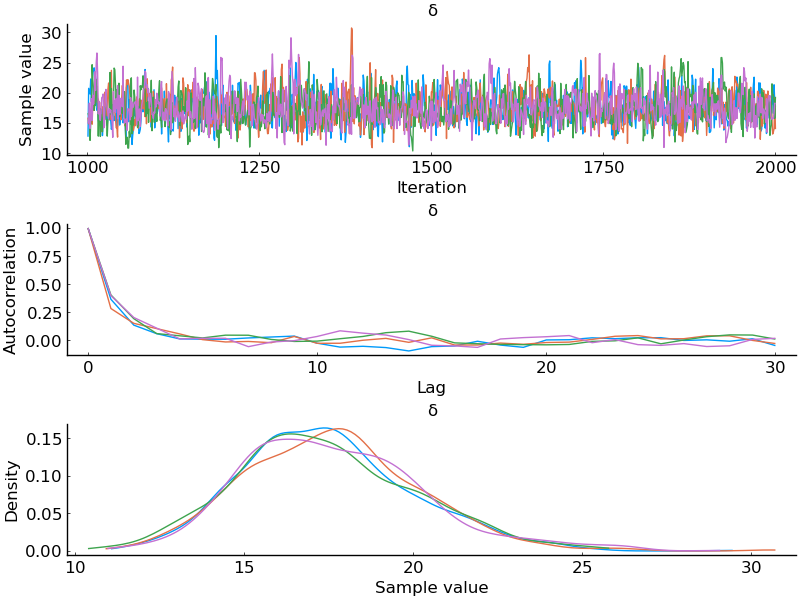

In [7]:
pyplot()
font_size = 12
ch = group(chain, :δ)
p1 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:traceplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p2 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:autocorplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p3 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:mixeddensity),
  grid=false, size=(250,100), titlefont=font(font_size))
pcδ = plot(p1, p2, p3, layout=(3,1), size=(800,600))

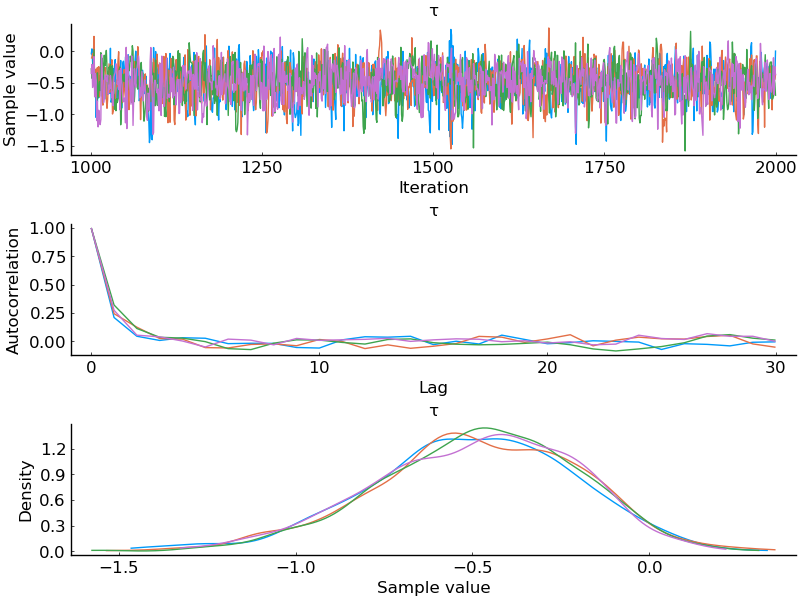

In [8]:
ch = group(chain, :τ)
p1 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:traceplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p2 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:autocorplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p3 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:mixeddensity),
  grid=false, size=(250,100), titlefont=font(font_size))
pcτ = plot(p1, p2, p3, layout=(3,1), size=(800,600))

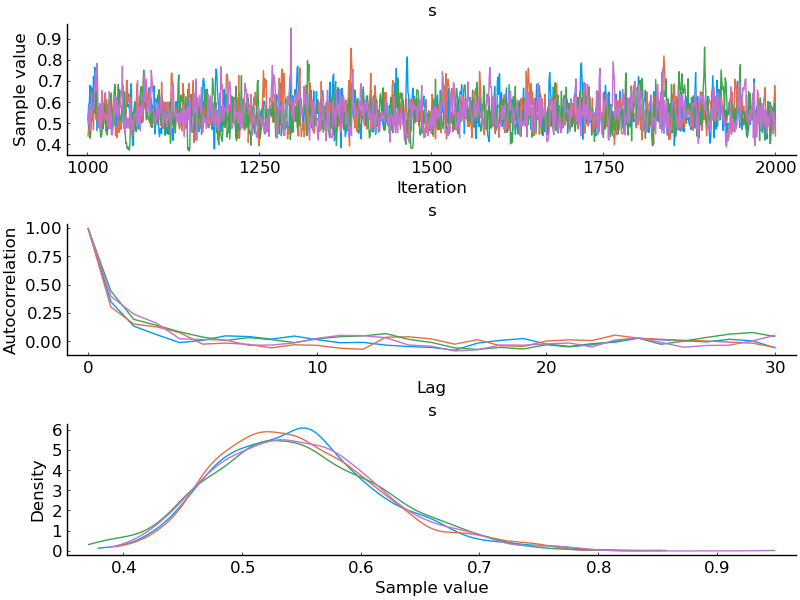

In [9]:
ch = group(chain, :s)
p1 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:traceplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p2 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:autocorplot),
  grid=false, size=(250,100), titlefont=font(font_size))
p3 = plot(ch, xaxis=font(font_size), yaxis=font(font_size), seriestype=(:mixeddensity),
  grid=false, size=(250,100), titlefont=font(font_size))
pcs = plot(p1, p2, p3, layout=(3,1), size=(800,600))

## Correlation of posterior distribution

Inspecting correlations in the posterior distribution can be helpful for identifying tradeoffs between parameters or non-identifiability. Moderate correlations indicate tradeoffs between parameters whereas correlations close to 1 or -1 indicate problems with identifiability. The correlation matrix below indicates a moderate tradeoff between parameters $\delta$ and $s$.

In [10]:
cor(chain)

Correlation
  parameters         δ         τ         s 
      Symbol   Float64   Float64   Float64 

           δ    1.0000   -0.2986    0.6899
           τ   -0.2986    1.0000   -0.4182
           s    0.6899   -0.4182    1.0000


### Posterior Predictive Distribution

#### Reaction Times

The code block below generates the posterior distribution of  mean reaction time for each of the six problems. One notable pattern is that the mean reaction time for the correct answer tends to be faster than the mean reaction time for incorrect answers.

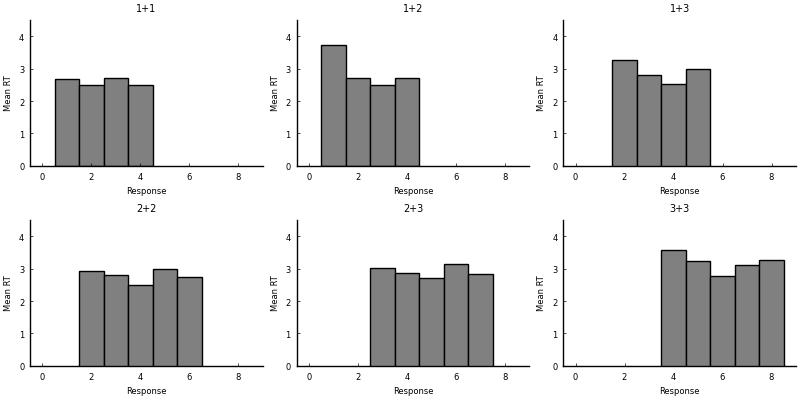

In [11]:
preds = posterior_predictive(x -> simulate(stimuli, parms; x...), chain, 1000)
preds = vcat(vcat(preds...)...)
df = DataFrame(preds)
sort!(stimuli)
p4 = rt_histogram(df, stimuli, size=(800,400))

#### Responses 
The plot below shows the response probabilities for each of the six addition problems. As expected, response probabilities are highest for correct answers, and decrease as a function of distance from the correct answer.

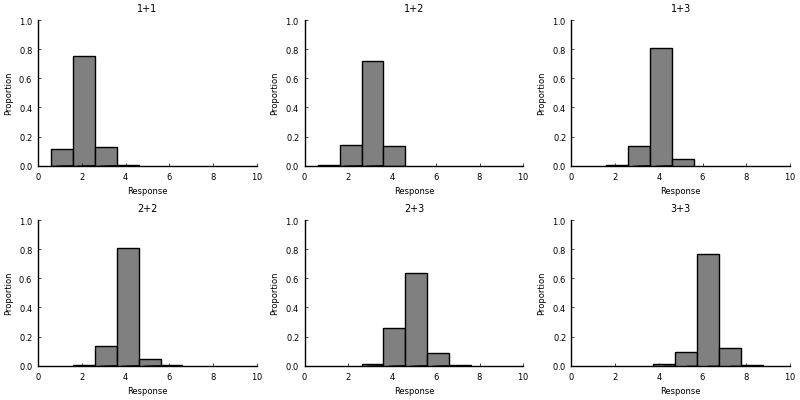

In [12]:
p5 = response_histogram(df, stimuli; size=(800,400))